<a href="https://colab.research.google.com/github/rcoborod/colab/blob/master/financeTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import os
import pathlib
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = True
np.set_printoptions(precision=4)

In [ ]:
!pip install yfinance
import yfinance as yf

In [21]:
data = yf.download("ADA-USD",interval='1d',auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


In [22]:

df= data.drop(columns=['Volume']).apply(np.log2)

In [23]:
date_time=pd.to_datetime(df.index,infer_datetime_format=True)
date_time

DatetimeIndex(['2017-10-01', '2017-10-02', '2017-10-03', '2017-10-04',
               '2017-10-05', '2017-10-06', '2017-10-07', '2017-10-08',
               '2017-10-09', '2017-10-10',
               ...
               '2021-03-17', '2021-03-18', '2021-03-19', '2021-03-20',
               '2021-03-21', '2021-03-22', '2021-03-23', '2021-03-24',
               '2021-03-25', '2021-03-26'],
              dtype='datetime64[ns]', name='Date', length=1269, freq=None)

In [24]:
date_time.size
a=np.arange(0,date_time.size*4,4)
b=np.random.randint(1,3,size=(date_time.size))
c = 3 - b
b += a
c += a
d = a +3
a,b,c,d


(array([   0,    4,    8, ..., 5064, 5068, 5072]),
 array([   2,    5,   10, ..., 5066, 5070, 5074]),
 array([   1,    6,    9, ..., 5065, 5069, 5073]),
 array([   3,    7,   11, ..., 5067, 5071, 5075]))

In [26]:
df['Open']
#pd.Series(df['Open'],index=a)
df['io']=a
df['ih']=b
df['il']=c
df['ic']=d
df[['io','Open']].values
kk=pd.DataFrame(data=df['Open'].values,index=df['io'].values,  columns=['val'] )
kk=kk.append(pd.DataFrame(data=df['High'].values,index=df['ih'].values,  columns=['val'] ),sort=True)
kk=kk.append(pd.DataFrame(data=df['Low'].values,index=df['il'].values, columns=['val'] ),sort=True)
kk=kk.append(pd.DataFrame(data=df['Close'].values,index=df['ic'].values, columns=['val'] ),sort=True)

In [28]:
df
kk

,val
0,-5.527624
4,-5.344787
8,-5.278892
12,-5.582840
16,-5.509570
...,...
5059,0.150396
5063,0.165496
5067,0.104339
5071,0.139566


In [29]:
kk.sort_index(inplace=True)
(kk*0).sort_index()
kk

,val
0,-5.527624
1,-5.848588
2,-4.955631
3,-5.323718
4,-5.344787
...,...
5071,0.139566
5072,0.151609
5073,0.142421
5074,0.349640


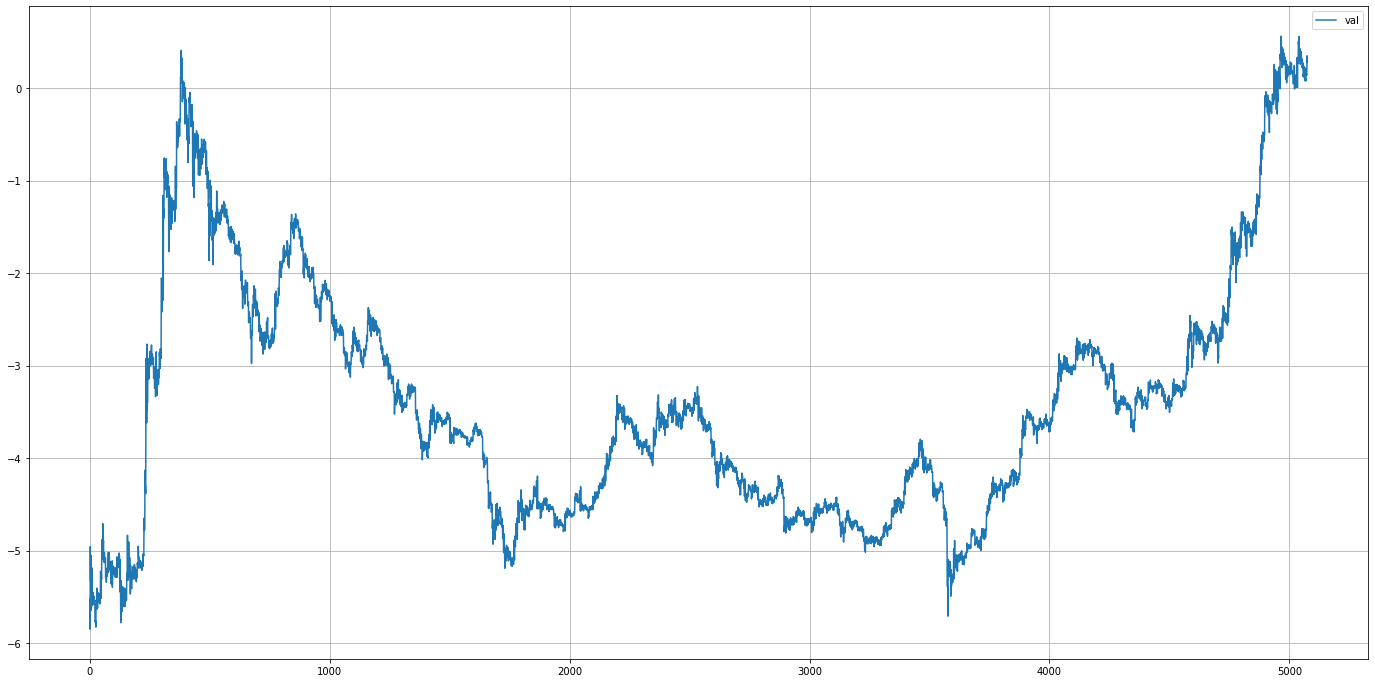

In [30]:
kk.plot(figsize=(24,12))

In [59]:
kk.shape[1]
pd.concat([kk.head(10),kk.rolling(4).min().shift(-3).head(10),kk.rolling(4).max().shift(-3).head(10)],axis=1)

,val,val,val
0,-5.527624,-5.848588,-4.955631
1,-5.848588,-5.848588,-4.955631
2,-4.955631,-5.344787,-4.955631
3,-5.323718,-5.646094,-5.054668
4,-5.344787,-5.646094,-5.054668
5,-5.054668,-5.646094,-5.054668
6,-5.646094,-5.646094,-5.269123
7,-5.269123,-5.594923,-5.188365
8,-5.278892,-5.594923,-5.188365
9,-5.594923,-5.594923,-5.188365
